## Pre-processing Audio data for Deep Learning

In [5]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = 'blues.0000.wav'

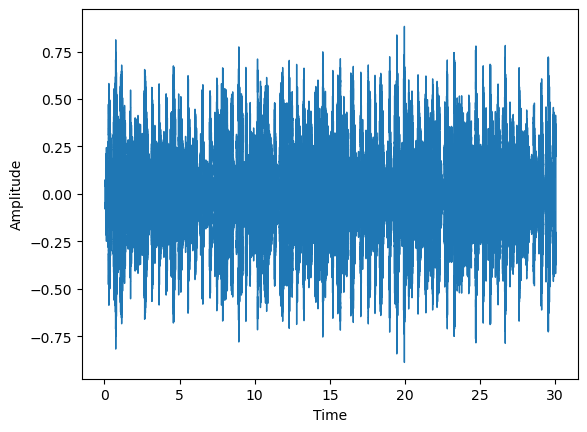

In [3]:
## waveform

signal, sr = librosa.load(file, sr = 22050) # signal is a numpy array, conatining sample rate(sr) * Time, no of elements
                                            # signal_numpy = sr * T
librosa.display.waveshow(signal, sr = sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

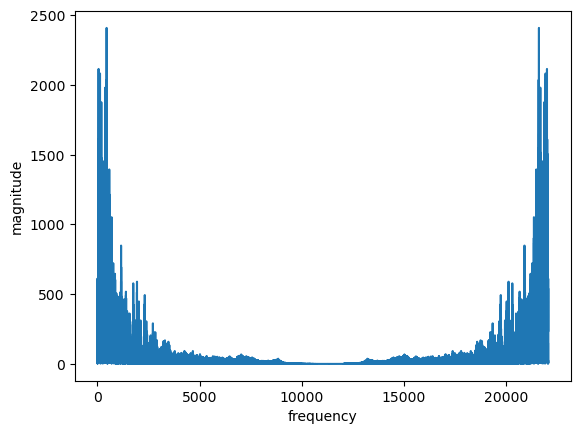

"it is static, it's important to have dynamic view, like how the amplitude is changing with time as well as frequency"

In [4]:
## Fast Fourier Transformation(fft), time domain to frequency domain

import numpy as np

fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(frequency, magnitude)
# plt.plot(left_frequency, left_magnitude)
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()


"""it is static, it's important to have dynamic view, like how the amplitude is changing with time as well as frequency"""

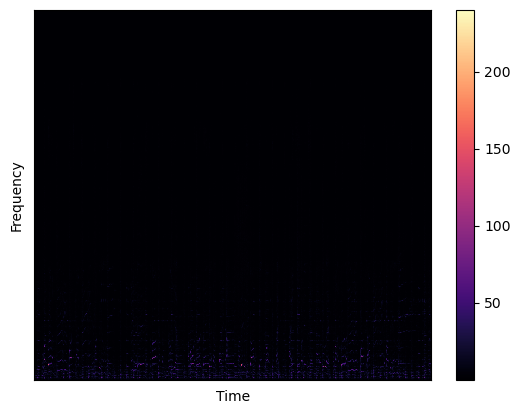

In [6]:
## stft --> spectography

n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)


librosa.display.specshow(spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

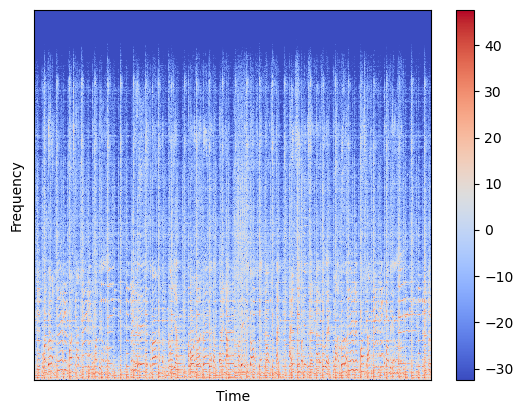

In [7]:
## stft --> spectography
## log_stft


n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)


librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

"""Waveform, itself was quite stable. That's why the log_spectrogram is also stable and quite observable."""

C:\Users\saiba\AppData\Local\Temp\ipykernel_8136\414724329.py:5: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13) ## n_mfcc, no of features want to extract


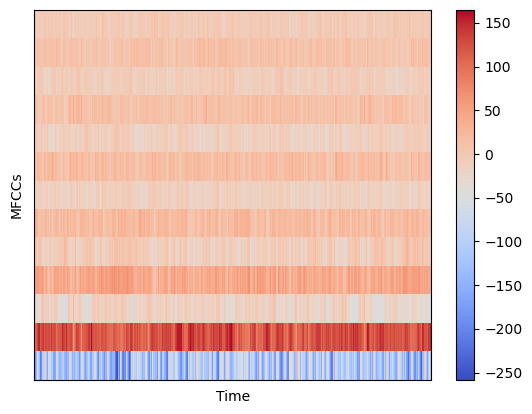

In [10]:
## MFCCs --> feature extraction

'''MFCCs can be applied only after short term fourier transformation'''

MFCCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13) ## n_mfcc, no of features want to extract
librosa.display.specshow(MFCCs, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCCs")
plt.colorbar()
plt.show()
